<a href="https://colab.research.google.com/github/dedenamikom/AplikasiInputDataMahasiswa/blob/master/Salinan_dari_UAS_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/UAS_BDDM_5190/healthcare-dataset-stroke-data.csv')

**Data preprocessing**

In [34]:
# Menampilkan 5 baris pertama
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [35]:
# memeriksa nilai yang hilang
missing_values = df.isnull().sum()
print(missing_values)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [36]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

<ipython-input-36-2a6d4795ba2f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].mean(), inplace=True)


In [37]:
missing_values = df.isnull().sum()
print(missing_values)

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [38]:
# mengecek tipe data dari tiap kolom
df.dtypes

,0
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


In [39]:
#Menampilkan semua kolom
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [40]:
#menghapus kolom 'Unnamed: 0'
df = df.drop(['id','Residence_type','ever_married'], axis=1)

In [41]:
# melihat kolom yang telah di update
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'work_type',
       'avg_glucose_level', 'bmi', 'smoking_status', 'stroke'],
      dtype='object')

In [42]:
#menampilkan informasi ringkas dalam semua dataset yang telah di perbaharui
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   work_type          5110 non-null   object 
 5   avg_glucose_level  5110 non-null   float64
 6   bmi                5110 non-null   float64
 7   smoking_status     5110 non-null   object 
 8   stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 359.4+ KB


In [65]:
# Memisahkan fitur (X) dan target (y)
X = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
y = df['stroke']


In [72]:
# Menampilkan fitur (X)
print("Fitur (X):")
print(X.head())  # Menampilkan 5 baris pertama dari X

# Menampilkan target (y)
print("\nTarget (y):")
print(y.head())  # Menampilkan 5 baris pertama dari y


Fitur (X):
    age  hypertension  heart_disease  avg_glucose_level   bmi
0  67.0             0              1             228.69  36.6
1  61.0             0              0             202.21   NaN
2  80.0             0              1             105.92  32.5
3  49.0             0              0             171.23  34.4
4  79.0             1              0             174.12  24.0

Target (y):
0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64


In [73]:
# Menghapus baris dengan nilai non-numerik di kolom 'bmi'
df = df[pd.to_numeric(df['bmi'], errors='coerce').notna()]


In [75]:
print(df.head())


      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   
5        Private          Urban             186.21  29.0  formerly smoked   

   stroke  
0       1  
2       1  
3       1  
4       1  
5       1  


**EXPLORATORY DATA ANALYSIS**

Alasan mengapa memilih kolom age karena merupakan kolom numerik yang umum digunakan dalam dataset dan mudah dipahami, dan juga karena Penyakit jantung lebih umum terjadi pada orang yang lebih tua, sehingga usia merupakan faktor risiko penting

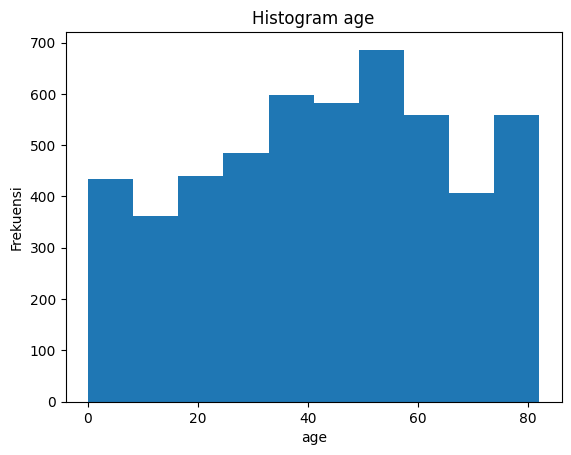

In [66]:
import matplotlib.pyplot as plt

# Pilih kolom yang divisualisasikan
kolom = 'age'
# Buat histogram
plt.hist(df[kolom], bins=10)

# judul dan label sumbu
plt.title('Histogram ' + kolom)
plt.xlabel(kolom)
plt.ylabel('Frekuensi')

# Tampilkan histogram
plt.show()

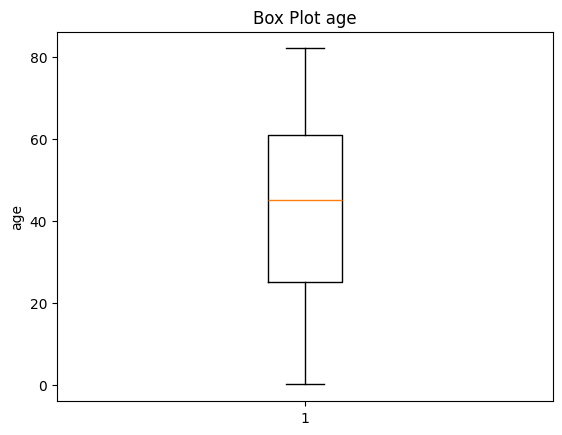

In [67]:
kolom = 'age'
plt.boxplot(df[kolom])
plt.title('Box Plot ' + kolom)
plt.ylabel(kolom)
plt.show()

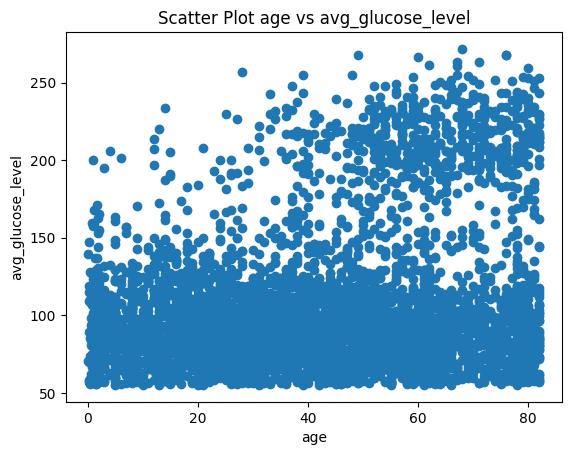

In [68]:
import matplotlib.pyplot as plt

# Pilih kolom yang ingin divisualisasikan
kolom_x = 'age'
kolom_y = 'avg_glucose_level'

# Buat scatter plot
plt.scatter(df[kolom_x], df[kolom_y])

# Tambahkan judul dan label sumbu
plt.title('Scatter Plot ' + kolom_x + ' vs ' + kolom_y)
plt.xlabel(kolom_x)
plt.ylabel(kolom_y)

# Tampilkan scatter plot
plt.show()

Alasan memilih kolom 'resting bps' karena Tekanan darah tinggi juga merupakan faktor risiko utama penyakit jantung

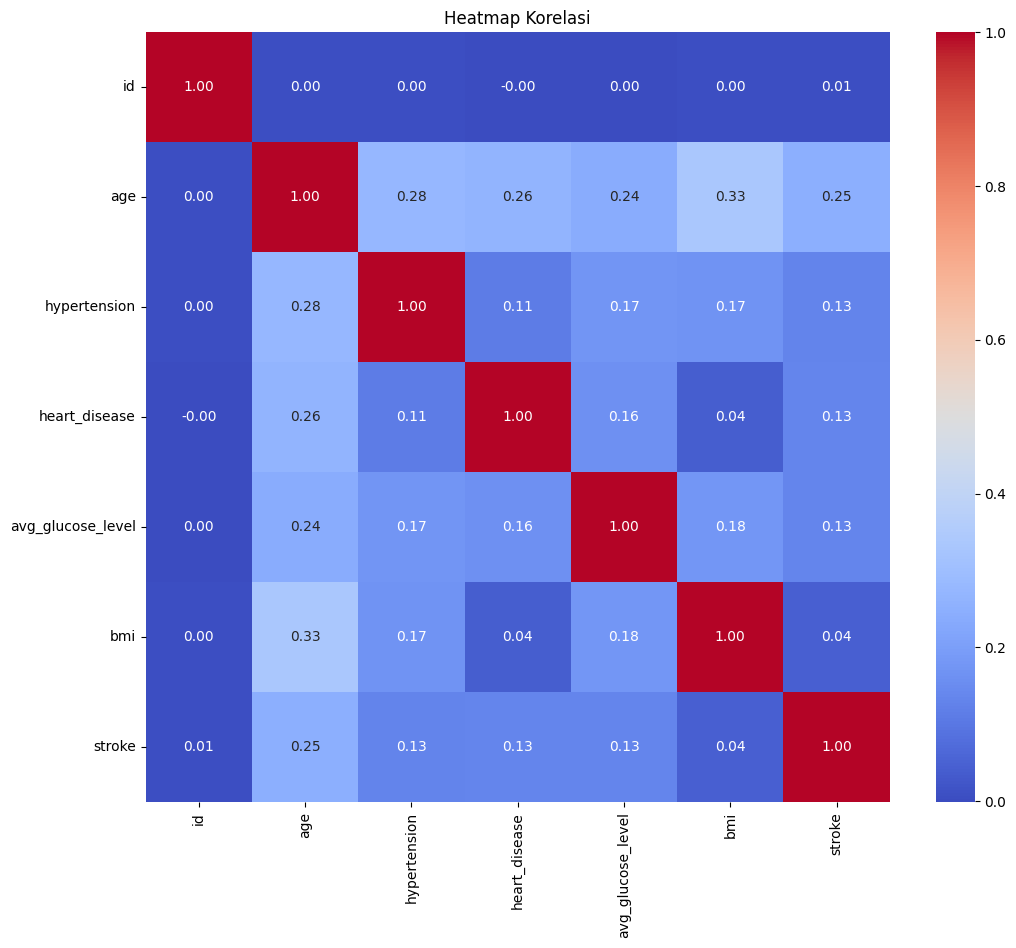

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['number'])

# Hitung matriks korelasi using the numeric DataFrame
correlation_matrix = numeric_df.corr()

# Buat heatmap
plt.figure(figsize=(12, 10))  # Atur ukuran gambar jika perlu
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi')
plt.show()

**SELEKSI FITUR**


Seleksi fitur menggunakan filter method
alasannya karena  Metode ini sederhana dan cepat, cocok untuk dataset yang besar.

**Modeling**


In [83]:
# Menghapus baris yang memiliki nilai NaN
X = X.dropna()
y = y[X.index]  # Pastikan target y sesuai dengan X setelah penghapusan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

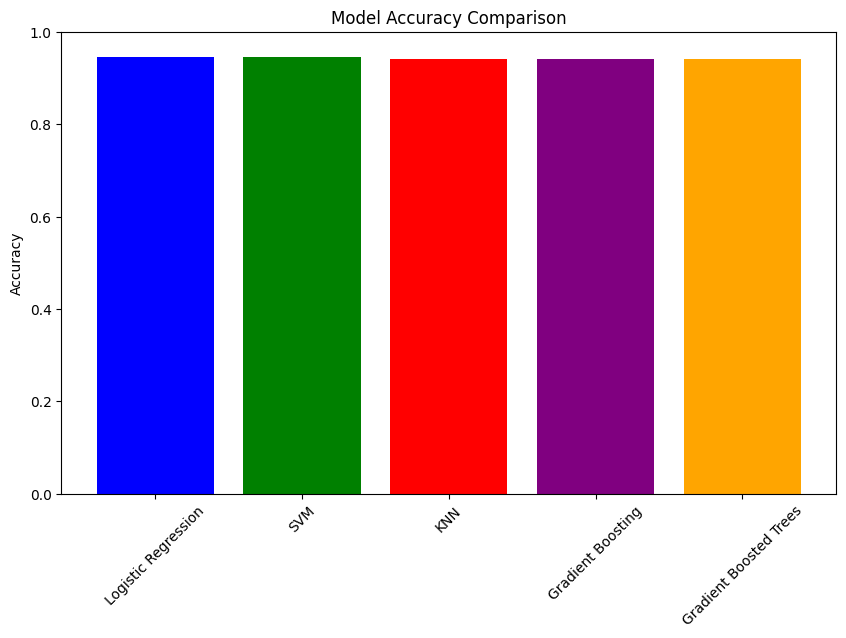

Logistic Regression:
  Accuracy: 0.95
  Precision: 0.47
  Recall: 0.50
  F1-Score: 0.49
--------------------------------------------------
SVM:
  Accuracy: 0.95
  Precision: 0.47
  Recall: 0.50
  F1-Score: 0.49
--------------------------------------------------
KNN:
  Accuracy: 0.94
  Precision: 0.47
  Recall: 0.50
  F1-Score: 0.48
--------------------------------------------------
Gradient Boosting:
  Accuracy: 0.94
  Precision: 0.47
  Recall: 0.50
  F1-Score: 0.49
--------------------------------------------------
Gradient Boosted Trees:
  Accuracy: 0.94
  Precision: 0.56
  Recall: 0.51
  F1-Score: 0.50
--------------------------------------------------


In [84]:
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Split dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Model Building
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Gradient Boosted Trees": HistGradientBoostingClassifier()
}

# Dictionary untuk menyimpan hasil
accuracies = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}

# Melatih dan menguji model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Menghitung metrik
    accuracies[name] = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Simpan nilai precision, recall, f1-score untuk masing-masing model
    precision_scores[name] = report['macro avg']['precision']
    recall_scores[name] = report['macro avg']['recall']
    f1_scores[name] = report['macro avg']['f1-score']

# 4. Visualisasi Akurasi
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

# Print akurasi, precision, recall, f1-score untuk setiap model
for name in models.keys():
    print(f"{name}:")
    print(f"  Accuracy: {accuracies[name]:.2f}")
    print(f"  Precision: {precision_scores[name]:.2f}")
    print(f"  Recall: {recall_scores[name]:.2f}")
    print(f"  F1-Score: {f1_scores[name]:.2f}")
    print("-" * 50)

**Evaluasi Model**

In [85]:
import joblib

# Simpan model Gradient Boosting ke file bernama "Gradient Boosted.pkl"
joblib.dump(models['Gradient Boosted Trees'], "GradientBoostedTrees.pkl")
print("Model Gradient Boosted Trees berhasil disimpan!")

Model Gradient Boosted Trees berhasil disimpan!
